# Linear Regression with One Variable
---

In [2]:
clear ; close all; clc

% Load training data
% The first column is the population size (in 10,000s) of a city 
% and the second column is the profit (in 10,000s) of a food truck in that city. 
% A negative value for profit indicates a loss.
trainning_set_1 = [6.1101,17.592; 5.5277,9.1302; 8.5186,13.662; 7.0032,11.854; 5.8598,6.8233; 8.3829,11.886; 7.4764,4.3483; 8.5781,12; 6.4862,6.5987; 5.0546,3.8166; 5.7107,3.2522; 14.164,15.505; 5.734,3.1551; 8.4084,7.2258; 5.6407,0.71618; 5.3794,3.5129; 6.3654,5.3048; 5.1301,0.56077; 6.4296,3.6518; 7.0708,5.3893; 6.1891,3.1386; 20.27,21.767; 5.4901,4.263; 6.3261,5.1875; 5.5649,3.0825; 18.945,22.638; 12.828,13.501; 10.957,7.0467; 13.176,14.692; 22.203,24.147; 5.2524,-1.22; 6.5894,5.9966; 9.2482,12.134; 5.8918,1.8495; 8.2111,6.5426; 7.9334,4.5623; 8.0959,4.1164; 5.6063,3.3928; 12.836,10.117; 6.3534,5.4974; 5.4069,0.55657; 6.8825,3.9115; 11.708,5.3854; 5.7737,2.4406; 7.8247,6.7318; 7.0931,1.0463; 5.0702,5.1337; 5.8014,1.844; 11.7,8.0043; 5.5416,1.0179; 7.5402,6.7504; 5.3077,1.8396; 7.4239,4.2885; 7.6031,4.9981; 6.3328,1.4233; 6.3589,-1.4211; 6.2742,2.4756; 5.6397,4.6042; 9.3102,3.9624; 9.4536,5.4141; 8.8254,5.1694; 5.1793,-0.74279; 21.279,17.929; 14.908,12.054; 18.959,17.054; 7.2182,4.8852; 8.2951,5.7442; 10.236,7.7754; 5.4994,1.0173; 20.341,20.992; 10.136,6.6799; 7.3345,4.0259; 6.0062,1.2784; 7.2259,3.3411; 5.0269,-2.6807; 6.5479,0.29678; 7.5386,3.8845; 5.0365,5.7014; 10.274,6.7526; 5.1077,2.0576; 5.7292,0.47953; 5.1884,0.20421; 6.3557,0.67861; 9.7687,7.5435; 6.5159,5.3436; 8.5172,4.2415; 9.1802,6.7981; 6.002,0.92695; 5.5204,0.152; 5.0594,2.8214; 5.7077,1.8451; 7.6366,4.2959; 5.8707,7.2029; 5.3054,1.9869; 8.2934,0.14454; 13.394,9.0551; 5.4369,0.61705];

% Initialize some useful values
X = trainning_set_1(:, 1); 
y = trainning_set_1(:, 2);
m = length(y); % number of training examples

% Add a column of 'ones' to X
X = [ones(m, 1), trainning_set_1(:,1)]; 

In [3]:
%% Test Linear Regression Cost function 32.07 and 54.24
[J, grad] = linearRegressionCostFunction(X, y, zeros(2, 1), 0)

J =  32.073
grad =

   -5.8391
  -65.3288



In [17]:
[J, grad] = linearRegressionCostFunction(X, y, [-1; 2], 9)

J =  54.428
grad =

    9.4805
   89.5048



In [22]:
lambda = 0;
initial_theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
%iterations = 7000; % when 7000, the result will same with normal equation
alpha = 0.01; % you can change this value to observe the change in the rate of convergence

% Calculate the parameters from the normal equation
pinv(X' * X) * X' * y 

% run gradient descent
costFunction = @(t) linearRegressionCostFunction(X, y, t, lambda); % short hand
[theta, Jh] = userDefinedGradientDescent(costFunction, initial_theta, alpha, iterations);

% Theta found by gradient descent and the expected theta values (approx) : -3.6303 & 1.1664， when iterations = 1500;
theta

ans =

  -3.8958
   1.1930

theta =

  -3.6303
   1.1664



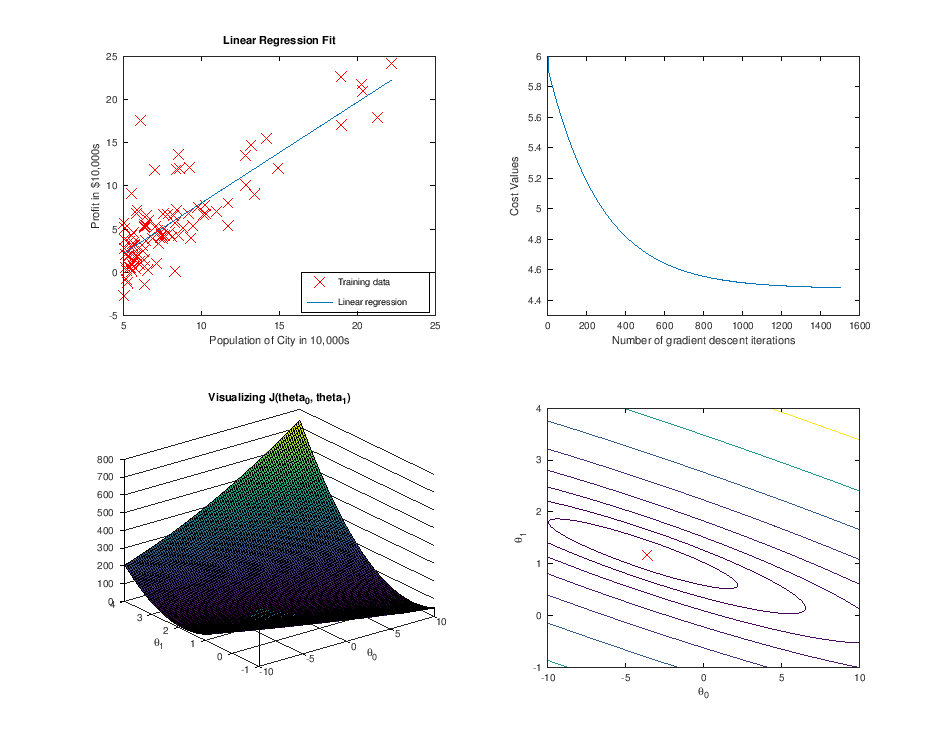

In [41]:
figure(1,"position", [1 1 950 750]);

% Plot the data set and the linear fit
subplot(2, 2, 1);
plot(trainning_set_1(:, 1), y, 'rx', 'MarkerSize', 10); % Plot the data
title (sprintf('Linear Regression Fit'));
ylabel('Profit in $10,000s'); % Set the y-axis label
xlabel('Population of City in 10,000s'); % Set the x-axis label
hold on; % keep previous plot visible
plot(X(:,2), X * theta, '-')
legend('Training data', 'Linear regression', 'location', 'southeast');
hold off % don't overlay any more plots on this figur
subplot(2, 2, 2);
plot(1:numel(Jh), Jh, '-');
ylabel('Cost Values'); % Set the y-axis label
xlabel('Number of gradient descent iterations'); % Set the x-axis label
axis([0 1600 4.3 6]);

subplot(2, 2, 3);
% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);
% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));
% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];
        J_vals(i,j) = linearRegressionCostFunction(X, y, t, 0);
    end
end
% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
%figure;
surf(theta0_vals, theta1_vals, J_vals);
xlabel('\theta_0'); ylabel('\theta_1');
title('Visualizing J(theta_0, theta_1)');

subplot(2, 2, 4);
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
hold off;

In [40]:
% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] * theta
predict2 = [1, 7] * theta

predict1 =  0.45198
predict2 =  4.5342


# Linear regression with multiple variables
---

In [1]:
%% Clear and Close Figures
clear ; close all; clc

% Load Data
% The first column is the size of the house (in square feet)
% The second column is the number of bedrooms, and the third column is the price of the house.
trainning_set_2 = [2104,3,399900; 1600,3,329900; 2400,3,369000; 1416,2,232000; 3000,4,539900; 1985,4,299900; 1534,3,314900; 1427,3,198999; 1380,3,212000; 1494,3,242500; 1940,4,239999; 2000,3,347000; 1890,3,329999; 4478,5,699900; 1268,3,259900; 2300,4,449900; 1320,2,299900; 1236,3,199900; 2609,4,499998; 3031,4,599000; 1767,3,252900; 1888,2,255000; 1604,3,242900; 1962,4,259900; 3890,3,573900; 1100,3,249900; 1458,3,464500; 2526,3,469000; 2200,3,475000; 2637,3,299900; 1839,2,349900; 1000,1,169900; 2040,4,314900; 3137,3,579900; 1811,4,285900; 1437,3,249900; 1239,3,229900; 2132,4,345000; 4215,4,549000; 2162,4,287000; 1664,2,368500; 2238,3,329900; 2567,4,314000; 1200,3,299000; 852,2,179900; 1852,4,299900; 1203,3,239500];

% Initialize some useful values
X = trainning_set_2(:, 1:2);
y = trainning_set_2(:, 3);
m = length(y);

In [2]:
%% Feature Scale - Normalization
% Compute mean value and standard deviation
mean_value = mean(X);
sigma = std(X);
    
% Normalization
X = (X - mean_value) ./ sigma;
X = [ones(m, 1) X]; % add bias unit

In [4]:
mean_value
sigma
X
y

mean_value =

   2000.6809      3.1702

sigma =

   794.70235     0.76098

X =

   1.00000000   0.13000987  -0.22367519
   1.00000000  -0.50418984  -0.22367519
   1.00000000   0.50247636  -0.22367519
   1.00000000  -0.73572306  -1.53776691
   1.00000000   1.25747602   1.09041654
   1.00000000  -0.01973173   1.09041654
   1.00000000  -0.58723980  -0.22367519
   1.00000000  -0.72188140  -0.22367519
   1.00000000  -0.78102304  -0.22367519
   1.00000000  -0.63757311  -0.22367519
   1.00000000  -0.07635670   1.09041654
   1.00000000  -0.00085674  -0.22367519
   1.00000000  -0.13927334  -0.22367519
   1.00000000   3.11729182   2.40450826
   1.00000000  -0.92195631  -0.22367519
   1.00000000   0.37664309   1.09041654
   1.00000000  -0.85652301  -1.53776691
   1.00000000  -0.96222296  -0.22367519
   1.00000000   0.76546791   1.09041654
   1.00000000   1.29648433   1.09041654
   1.00000000  -0.29404827  -0.22367519
   1.00000000  -0.14179001  -1.53776691
   1.00000000  -0.49915651  -0.22367519


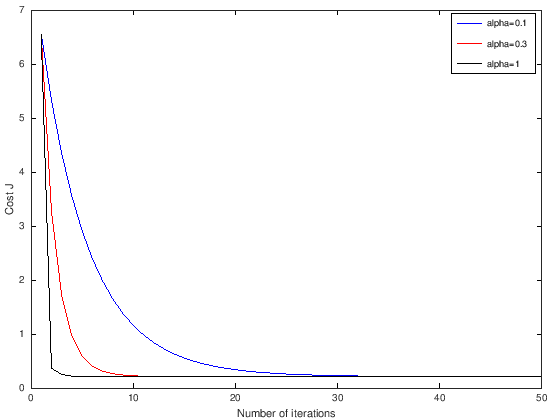

In [44]:
%% Change alpha value to observe the change in the rate of convergence

lambda = 0;
initial_theta = zeros(3, 1); % initialize fitting parameters
iterations = 50;

alpha = 0.1; % Change some alpha value for gradient descent
costFunction = @(t) linearRegressionCostFunction(X, y, t, lambda); % short hand
[theta, Jh] = userDefinedGradientDescent(costFunction, initial_theta, alpha, iterations);

% Plot the convergence graph
figure;
plot(1:numel(Jh), Jh/(10^10), '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

hold on; % Hint: By using the 'hold on' command, you can plot multiple graphs on the same figure.

alpha = 0.3; % Change some alpha value for gradient descent
costFunction = @(t) linearRegressionCostFunction(X, y, t, lambda); % short hand
[theta, Jh] = userDefinedGradientDescent(costFunction, initial_theta, alpha, iterations);

% Plot the convergence graph
plot(1:numel(Jh), Jh/(10^10), '-r', 'LineWidth', 2);

alpha = 1; % Change some alpha value for gradient descent
costFunction = @(t) linearRegressionCostFunction(X, y, t, lambda); % short hand
[theta, Jh] = userDefinedGradientDescent(costFunction, initial_theta, alpha, iterations);

% Plot the convergence graph
plot(1:numel(Jh), Jh/(10^10), '-k', 'LineWidth', 2);
legend('alpha=0.1', 'alpha=0.3', 'alpha=1');
hold off;

In [45]:
% Display Theta computed result from gradient descent
theta

% Calculate the parameters from the normal equation
pinv(X' * X) * X' * y

theta =

   340412.65957
   110631.05028
    -6649.47427

ans =

   340412.65957
   110631.05028
    -6649.47427



In [46]:
% Estimate the price of a 1650 sq-ft, 3 br house
% Recall that the first column of X is all-ones. Thus, it does not need to be normalized.
% Hint: At prediction, make sure you do the same feature normalization.
price = [1, (1650-mean_value(1))/sigma(1), (2-mean_value(2))/sigma(2)] * theta

price =  301819.48345
